# Discover Data via the STAC API

Datasets hosted at EODC are cataloged by making use of the [STAC](https://stacspec.org/en) (SpatioTemporal Asset Catalog) specifications. The catalog service is available as STAC API via [https://stac.eodc.eu/api/v1](https://stac.eodc.eu/api/v1) to enable users to discover and search for datasets filtering by space, time and other attributes. In the following we will demonstrate the use of the STAC API and open-source Python libraries to run search queries against multiple STAC API instances. This notebook is based on the quickstart guide provided by [Planetary Computer](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/) with the objective to showcase the accessibilty of data accross mulitple data providers.

EODC provides a STAC browser deployment via [https://dev.services.eodc.eu/browser/] in addition, to allow for the interactive discovery of available data.

## Search criteria

We can use the STAC API to search for assets meeting some criteria. This might include the date and time the asset covers, is spatial extent, or any other property captured in the STAC item’s metadata. Spatial extent can be defined using a bounding box, with optione *bbox*, or as one can pass a GeoJSON to the *intersects* option of the catalog search method.

In [86]:
time_range = "2023-03-01/2023-03-31"

area_of_interest = {
  "coordinates": [
          [
            [
              14.631570827879642,
              48.95580055524857
            ],
            [
              14.631570827879642,
              48.495695436823524
            ],
            [
              15.727627794927486,
              48.495695436823524
            ],
            [
              15.727627794927486,
              48.95580055524857
            ],
            [
              14.631570827879642,
              48.95580055524857
            ]
          ]
        ],
        "type": "Polygon"
}

## Search via EODC STAC API

In [87]:
import pystac_client

eodc_catalog = pystac_client.Client.open(
    "https://stac.eodc.eu/api/v1",
)

search = eodc_catalog.search(
    collections=["landsat-c2-l1"],
    intersects=area_of_interest,
    datetime=time_range
)
items_eodc = search.item_collection()
len(items_eodc)

/home/creimer/miniconda3/envs/poetry/lib/python3.11/site-packages/pystac_client/item_search.py:850: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


3

## Search via Plantary Computer STAC API

In [88]:

import planetary_computer

pc_catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
search = pc_catalog.search(
    collections=["landsat-c2-l2"],
    intersects=area_of_interest,
    datetime=time_range)
items_pc = search.item_collection()
len(items_pc)

13

Each `pystac.Item <https://pystac.readthedocs.io/en/stable/api/pystac.html#pystac.Item>` in this ItemCollection includes all the metadata for that scene. STAC Items are GeoJSON features, and so can be loaded by libraries like geopandas.

In [89]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items_eodc.to_dict(), crs="epsg:4326")
df

,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,...,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((14.72365 48.50727, 17.23880 48.08703...",30,2023-04-12T17:48:05.824629Z,10.5066/P975CC9B,2023-03-18T09:45:44.725469Z,landsat-9,32633,"[7901, 7811]",Landsat Collection 2 Level-1,"[oli, tirs]",...,027,LC91900272023077LGN00,190,2,154.144243,L1TP,38.527996,15.44,02,T1
1,"POLYGON ((14.74092 48.50885, 17.25520 48.08628...",30,2023-04-14T08:27:33.093696Z,10.5066/P975CC9B,2023-03-10T09:45:35.283929Z,landsat-8,32633,"[7911, 7801]",Landsat Collection 2 Level-1,"[oli, tirs]",...,027,LC81900272023069LGN00,190,2,154.616528,L1TP,35.344610,60.28,02,T1
2,"POLYGON ((13.74221 49.93080, 16.31946 49.48041...",30,2023-04-14T08:27:19.998916Z,10.5066/P975CC9B,2023-03-01T09:51:26.761489Z,landsat-8,32633,"[7991, 7891]",Landsat Collection 2 Level-1,"[oli, tirs]",...,026,LC81910262023060LGN00,191,2,156.131216,L1TP,30.710365,16.13,02,T1


In [90]:
df = geopandas.GeoDataFrame.from_features(items_pc.to_dict(), crs="epsg:4326")
df

,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,...,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((14.59862 49.88395, 14.01149 48.28928...",30,2023-07-07T09:23:00.590213Z,10.5066/P9C7I13B,2023-03-27T07:48:50.354797Z,landsat-7,32633,"[7291, 8221]",Landsat Collection 2 Level-2,[etm+],...,026,LE71900262023086SG100,190,2,122.056686,L2SP,27.896690,100.00,02,T2
1,"POLYGON ((14.76192 48.50785, 14.14130 46.80079...",30,2023-04-08T09:13:43.115488Z,10.5066/P9OGBGM6,2023-03-26T09:45:26.196843Z,landsat-8,32633,"[7911, 7801]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC81900272023085LGN00,190,2,153.571007,L2SP,41.698951,94.56,02,T1
2,"POLYGON ((15.30254 49.92715, 14.65459 48.22283...",30,2023-04-08T09:13:41.174359Z,10.5066/P9OGBGM6,2023-03-26T09:45:02.322747Z,landsat-8,32633,"[7891, 7791]",Landsat Collection 2 Level-2,"[oli, tirs]",...,026,LC81900262023085LGN00,190,2,154.696883,L2SP,40.558256,90.61,02,T1
3,"POLYGON ((13.75818 49.92495, 13.11007 48.22077...",30,2023-03-29T09:27:24.627292Z,10.5066/P9OGBGM6,2023-03-25T09:51:26.229841Z,landsat-9,32633,"[7971, 7881]",Landsat Collection 2 Level-2,"[oli, tirs]",...,026,LC91910262023084LGN00,191,2,154.808881,L2SP,40.175329,74.29,02,T1
4,"POLYGON ((15.80639 49.88859, 15.22037 48.29385...",30,2023-07-07T09:22:25.677747Z,10.5066/P9C7I13B,2023-03-22T07:44:33.011952Z,landsat-7,32633,"[7241, 8151]",Landsat Collection 2 Level-2,[etm+],...,026,LE71890262023081SG100,189,2,123.058625,L2SP,26.125160,74.00,02,T1
5,"POLYGON ((14.75543 48.50513, 14.13505 46.79858...",30,2023-03-28T20:40:20.250103Z,10.5066/P9OGBGM6,2023-03-18T09:45:44.725469Z,landsat-9,32633,"[7901, 7811]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC91900272023077LGN00,190,2,154.144243,L2SP,38.527996,15.44,02,T1
6,"POLYGON ((15.29709 49.92501, 14.64895 48.22092...",30,2023-03-28T20:40:19.267088Z,10.5066/P9OGBGM6,2023-03-18T09:45:20.842926Z,landsat-9,32633,"[7891, 7791]",Landsat Collection 2 Level-2,"[oli, tirs]",...,026,LC91900262023077LGN00,190,2,155.178809,L2SP,37.378832,40.34,02,T1
7,"POLYGON ((13.75854 49.92711, 13.11000 48.22266...",30,2023-03-28T20:40:43.008672Z,10.5066/P9OGBGM6,2023-03-17T09:51:19.732066Z,landsat-8,32633,"[7991, 7881]",Landsat Collection 2 Level-2,"[oli, tirs]",...,026,LC81910262023076LGN00,191,2,155.181441,L2SP,36.969560,1.06,02,T1
8,"POLYGON ((12.59283 49.88286, 12.00740 48.28858...",30,2023-07-07T09:22:55.198181Z,10.5066/P9C7I13B,2023-03-15T07:58:12.349947Z,landsat-7,32633,"[7431, 8341]",Landsat Collection 2 Level-2,[etm+],...,026,LE71920262023074ASN00,192,2,124.442557,L2SP,23.643080,42.00,02,T1
9,"POLYGON ((14.76638 48.50785, 14.14523 46.80082...",30,2023-03-24T05:29:05.839349Z,10.5066/P9OGBGM6,2023-03-10T09:45:35.283929Z,landsat-8,32633,"[7911, 7801]",Landsat Collection 2 Level-2,"[oli, tirs]",...,027,LC81900272023069LGN00,190,2,154.616528,L2SP,35.344610,60.28,02,T1


At EODC we only host Landsat-8 and Landsat-9, while PC provides additional access to Landsat-7. Furthermore, at EODC we only store optical data with a cloud cover less than 70%.

Now we can select the item with the least (min) cloud cover. Data providers exposing STAC can make use of a number of [STAC extensions](https://stac-extensions.github.io/). Some collections implement the so-called **eo extension**, which can be used to sort items by cloudiness.

In [91]:
selected_item = min(items_eodc, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)

<Item id=LC09_L1TP_190027_20230318_02_T1>


Each STAC item has one or more Assets, which include links to actual files.

In [92]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key ┃ Description                                                          ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ang       │ Angle Coefficients File                                              │
│ pan       │ Panchromatic Band                                                    │
│ red       │ Red Band                                                             │
│ saa       │ Solar Azimuth Angle Band                                             │
│ sza       │ Solar Zenith Angle Band                                              │
│ vaa       │ Sensor Azimuth Angle Band                                            │
│ vza       │ Sensor Zenith Angle Band                                             │
│ blue      │ Blue Band                                                            │
│ green     │ Green Band                                                           │
│ nir08     │ Near Infrared Band 0.8                                               │
│ cirrus    │ Cirrus Band                                                          │
│ lwir11    │ Thermal Infrared Band 10.9                                           │
│ lwir12    │ Thermal Infrared Band 12.0                                           │
│ swir16    │ Short-wave Infrared Band 1.6                                         │
│ swir22    │ Short-wave Infrared Band 2.2                                         │
│ coastal   │ Coastal/Aerosol Band                                                 │
│ mtl.txt   │ Product Metadata File (txt)                                          │
│ mtl.xml   │ Product Metadata File (xml)                                          │
│ tarball   │ TAR Archive                                                          │
│ qa_pixel  │ Pixel Quality Assessment Band                                        │
│ qa_radsat │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
└───────────┴──────────────────────────────────────────────────────────────────────┘

In [93]:
#selected_item.assets["rendered_preview"].to_dict()
selected_item.assets["pan"].to_dict()

{'href': 'https://stac.eodc.eu/data/collections/landsat-c2-l1/items/LC09_L1TP_190027_20230318_02_T1/pan',
 'type': 'image/tiff; application=geotiff; profile=cloud-optimized',
 'title': 'Panchromatic Band',
 'description': 'Collection 2 Level-1 Panchromatic Band (B8) Digital Number (DN)',
 'eo:bands': [{'name': 'OLI_B8',
   'common_name': 'pan',
   'description': 'Panchromatic',
   'center_wavelength': 0.59,
   'full_width_half_max': 0.17}],
 'alternate': {'local': {'href': '/eodc/products/usgs.gov/landsat9/L1TP/2023/03/18/LC09_L1TP_190027_20230318_20230318_02_T1.tar/LC09_L1TP_190027_20230318_20230318_02_T1_B8.TIF',
   'title': 'Local file path of the asset.'}},
 'raster:bands': [{'data_type': 'uint16', 'spatial_resolution': 15}],
 'roles': ['data']}

In [94]:
from IPython.display import Image

selected_item = min(items_pc, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)

Image(url=selected_item.assets["rendered_preview"].href, width=500)

<Item id=LC08_L2SP_191026_20230317_02_T1>


In [95]:
selected_item.assets["blue"].href[:250]

'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2023/191/026/LC08_L2SP_191026_20230317_20230324_02_T1/LC08_L2SP_191026_20230317_20230324_02_T1_SR_B2.TIF?st=2023-09-18T21%3A00%3A57Z&se=2023-09-19T21%3A45%3A57Z&sp=rl&sv'

In [96]:
import requests

requests.head(selected_item.assets["blue"].href).status_code

200

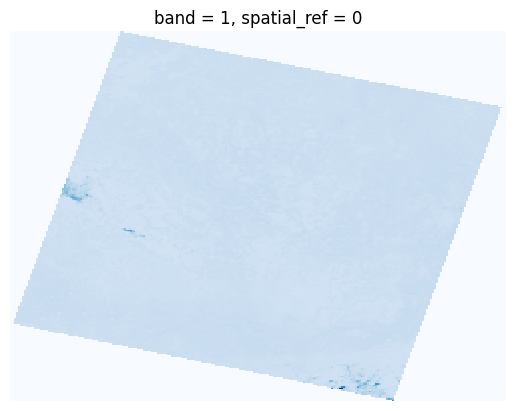

In [97]:
# import xarray as xr
import rioxarray

ds = rioxarray.open_rasterio(
    selected_item.assets["blue"].href, overview_level=4
).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();

In [98]:
import stackstac

ds = stackstac.stack(items_eodc)
ds

/home/creimer/miniconda3/envs/poetry/lib/python3.11/site-packages/stackstac/prepare.py:364: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-b2e3d9977db481b284ec099dd146f7e1' (time: 3,
                                                                band: 17,
                                                                y: 13202,
                                                                x: 10292)>
dask.array<fetch_raster_window, shape=(3, 17, 13202, 10292), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2023-03-01T09:51:26.76...
    id                           (time) <U31 'LC08_L1TP_191026_20230301_02_T1...
  * band                         (band) <U9 'pan' 'red' ... 'qa_radsat'
  * x                            (x) float64 3.582e+05 3.582e+05 ... 6.669e+05
  * y                            (y) float64 5.532e+06 5.532e+06 ... 5.136e+06
    landsat:wrs_type             <U1 '2'
    ...                           ...
    raster:bands                 (band) object [{'data_type': 'uint16', 'spat...
    classification:bitfields     (band) object None ... [{'name': 'band1', 'l...
    common_name                  (band) object 'pan' 'red' None ... None None
    center_wavelength            (band) object 0.59 0.65 None ... 0.44 None None
    full_width_half_max          (band) object 0.17 0.04 None ... 0.02 None None
    epsg                         int64 32633
Attributes:
    spec:        RasterSpec(epsg=32633, bounds=(358170.0, 5135970.0, 666930.0...
    crs:         epsg:32633
    transform:   | 30.00, 0.00, 358170.00|\n| 0.00,-30.00, 5532030.00|\n| 0.0...
    resolution:  30.0

## Searching additional properties provided by STAC

We can search for all Sentinel-1 GRD scenes over a given area and temporal extent observed in descending orbits.

In [99]:
search = eodc_catalog.search(
    collections=["SENTINEL1_GRD"],
    intersects=area_of_interest,
    datetime="2023-07-01/2023-08-01",
    query={"sat:orbit_state": {"eq": "descending"}},
)
items_s1_desc = search.item_collection()
df_s1 = geopandas.GeoDataFrame.from_features(items_s1_desc.to_dict(), crs="epsg:4326")
df_s1

,geometry,datetime,platform,s1:shape,proj:bbox,proj:epsg,providers,published,deprecated,proj:shape,...,s1:product_identifier,s1:product_timeliness,s1:processing_datetime,sar:resolution_azimuth,sar:pixel_spacing_range,sar:observation_direction,sar:pixel_spacing_azimuth,sar:looks_equivalent_number,s1:instrument_configuration_ID,sat:platform_international_designator
0,"POLYGON ((16.73882 47.56600, 13.25072 47.97464...",2023-07-16T05:10:35.113262Z,sentinel-1a,"[26539, 16671]","[13.250716, 47.566002, 17.199364, 49.470612]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2023-07-25T11:16:15Z,False,"[26539, 16671]",...,S1A_IW_GRDH_1SDV_20230716T051022_20230716T0510...,NRT-3h,2023-07-16T06:01:14.000000Z,22,10,right,10,4.4,7,2014-016A
1,"POLYGON ((18.68942 47.17551, 15.23226 47.58373...",2023-07-11T05:02:27.583556Z,sentinel-1a,"[26498, 16669]","[15.232264, 47.17551, 19.131147, 49.081249]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2023-07-24T14:17:38Z,False,"[26498, 16669]",...,S1A_IW_GRDH_1SDV_20230711T050215_20230711T0502...,NRT-3h,2023-07-11T05:59:32.000000Z,22,10,right,10,4.4,7,2014-016A
2,"POLYGON ((14.71722 47.68746, 11.21864 48.09641...",2023-07-09T05:18:46.370119Z,sentinel-1a,"[26556, 16670]","[11.218637, 47.687458, 15.178359, 49.592319]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2023-07-24T05:55:30Z,False,"[26556, 16670]",...,S1A_IW_GRDH_1SDV_20230709T051833_20230709T0518...,NRT-3h,2023-07-09T06:09:53.000000Z,22,10,right,10,4.4,7,2014-016A
3,"POLYGON ((16.73928 47.56608, 13.25103 47.97471...",2023-07-04T05:10:34.150663Z,sentinel-1a,"[26540, 16670]","[13.25103, 47.566078, 17.19977, 49.4706]",4326,"[{'url': 'https://earth.esa.int/eogateway', 'n...",2023-07-23T10:09:31Z,False,"[26540, 16670]",...,S1A_IW_GRDH_1SDV_20230704T051021_20230704T0510...,NRT-3h,2023-07-04T06:00:13.000000Z,22,10,right,10,4.4,7,2014-016A


## Analysing STAC Metadata

STAC items are proper GeoJSON Features, and so can be treated as a kind of data on their own.

Found 52 Sentinel-2 tiles.

ERROR 1: PROJ: internal_proj_create_from_database: /home/creimer/miniconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


CRSError: The WKT could not be parsed. OGR Error code 6

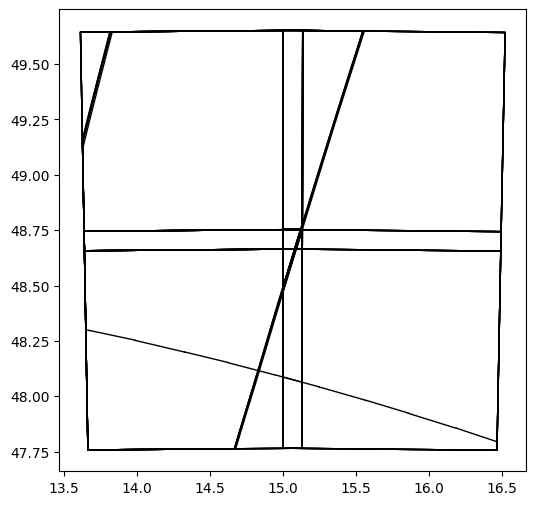

In [100]:
import contextily

search = pc_catalog.search(
    collections=["sentinel-2-l2a"],
    intersects=area_of_interest,
    datetime=time_range,
)
items = search.item_collection()

rich.print(f"Found {len(items)} Sentinel-2 tiles.")

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
ax = df[["geometry", "datetime", "s2:mgrs_tile", "eo:cloud_cover"]].plot(
    facecolor="none", figsize=(12, 6)
)
contextily.add_basemap(ax, crs=df.crs.to_string());

We can also compute the cloud coverage of Sentinel-2 over Austria over time.

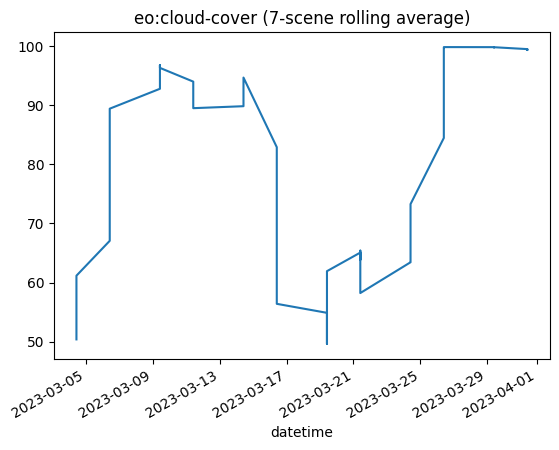

In [ ]:
import pandas as pd

search = pc_catalog.search(
    collections=["sentinel-2-l2a"],
    intersects=area_of_interest,
    datetime=time_range,
)
items = search.item_collection()
df = geopandas.GeoDataFrame.from_features(items.to_dict())
df["datetime"] = pd.to_datetime(df["datetime"])

ts = df.set_index("datetime").sort_index()["eo:cloud_cover"].rolling(7).mean()
ts.plot(title="eo:cloud-cover (7-scene rolling average)");

## Explore STAC Catalogs and Collections

Our catalog is a STAC Catalog that we can crawl or search. The Catalog contains STAC Collections for each dataset we have indexed (which is not the yet the entirety of data hosted by the Planetary Computer).

Collections have information about the STAC Items they contain. For instance, here we look at the Bands available for Landsat 8 Collection 2 Level 2 data:

In [ ]:
import pandas as pd

sentinel2_l1c = eodc_catalog.get_collection("SENTINEL2_L1C")

pd.DataFrame(sentinel2_l1c.summaries.get_list("eo:bands"))

,name,common_name,description,center_wavelength,full_width_half_max
0,B01,coastal,Band 1 - Coastal aerosol,0.4430,0.027
1,B02,blue,Band 2 - Blue,0.4900,0.098
2,B03,green,Band 3 - Green,0.5600,0.045
3,B04,red,Band 4 - Red,0.6650,0.038
4,B05,rededge,Band 5 - Vegetation red edge 1,0.7040,0.019
5,B06,rededge,Band 6 - Vegetation red edge 2,0.7400,0.018
6,B07,rededge,Band 7 - Vegetation red edge 3,0.7830,0.028
7,B08,nir,Band 8 - NIR,0.8420,0.145
8,B8A,rededge,Band 8A - Vegetation red edge 4,0.8650,0.033
9,B09,NaN,Band 9 - Water vapor,0.9450,0.026


We can see what Assets are available on our item with:

In [ ]:
pd.DataFrame.from_dict(sentinel2_l1c.extra_fields["item_assets"], orient="index")

,roles,title,alternate,media_type,description
B01,[data],Band 1 - Coastal aerosol - 60m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B02,[data],Band 2 - Blue - 10m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B03,[data],Band 3 - Green - 10m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B04,[data],Band 4 - Red - 10m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B05,[data],Band 5 - Vegetation red edge 1 - 20m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B06,[data],Band 6 - Vegetation red edge 2 - 20m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B07,[data],Band 7 - Vegetation red edge 3 - 20m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B08,[data],Band 8 - NIR - 10m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B09,[data],Band 9 - Water vapor - 60m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
B10,[data],Band 10 - SWIR - Cirrus - 60m,{'dhus': {'title': 'Location of the asset on t...,image/jp2,NaN
